In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def confidence_interval (data, rep=100, coeff=1.96): #default 95%
    data_avg=np.mean(data,axis=1)
    data_std=np.std(data,axis=1)
    max_val=data_avg+coeff*data_std/np.sqrt(rep)
    min_val=data_avg-coeff*data_std/np.sqrt(rep)
    return data_avg, data_std, max_val, min_val

def plot_confidence_interval (plt, data, x_axis, color):
    data_avg, data_std, max_val, min_val = confidence_interval (data)
    plt.fill_between(x_axis, data_avg, max_val, alpha=0.3, color=color)
    plt.fill_between(x_axis, min_val, data_avg, alpha=0.3, color=color)
    
def convert_label(label):
    load, tx_batches ,buff_raw = label.split(" ")
    buff = buff_raw[0:-9]
    return [int(load),int(tx_batches),int(buff)]

def struct_data(data):
    structed_data = []
    index = 0
    while index < len(data)-1:
        if data[index]=='\n':
            flag = convert_label(data[index+1])
            index += 2
            while data[index]!='\n' and index<len(data)-1:
                structed_data.append(flag+data[index].split(" "))
                index += 1
    return np.array(structed_data)

In [3]:
# Read throuthput log file and convert to data frame
f = open("./logs_general/thr_sub_msg.txt",'r')
data = f.readlines()
f.close()
df_thr= pd.DataFrame(struct_data(data)[:,0:4], columns=["payload","tx_batches","sub_buff","throughput"]) 
df_thr["throughput"]=df_thr["throughput"].map(lambda e: float(e))
df_thr["payload"]=df_thr["payload"].map(lambda e: int(e))
df_thr["tx_batches"]=df_thr["tx_batches"].map(lambda e: int(e))
df_thr["sub_buff"]=df_thr["sub_buff"].map(lambda e: int(e))
df_thr
# Read subscriber's memory usage log file and convert to data frame
f = open("./logs_general/mem_sub_msg.txt",'r')
data = f.readlines()
f.close()
df_mem_sub=pd.DataFrame(struct_data(data)[:,0:6], columns=["payload","tx_batches","sub_buff","total_mem","RSS","shared_mem"]) 
df_mem_sub["payload"]=df_mem_sub["payload"].map(lambda e: int(e))
df_mem_sub["sub_buff"]=df_mem_sub["sub_buff"].map(lambda e: int(e))
df_mem_sub["tx_batches"]=df_mem_sub["tx_batches"].map(lambda e: int(e))
df_mem_sub["total_mem"]=df_mem_sub["total_mem"].map(lambda e: int(e)*4096)
df_mem_sub["RSS"]=df_mem_sub["RSS"].map(lambda e: int(e)*4096)
df_mem_sub["shared_mem"]=df_mem_sub["shared_mem"].map(lambda e: int(e)*4096)
df_mem_sub

# Read publisher's memory usage log file and convert to data frame
f = open("./logs_general/mem_pub_msg.txt",'r')
data = f.readlines()
f.close()
df_mem_pub=pd.DataFrame(struct_data(data)[:,0:6], columns=["payload","tx_batches","sub_buff","total_mem","RSS","shared_mem"]) 
df_mem_pub["payload"]=df_mem_pub["payload"].map(lambda e: int(e))
df_mem_pub["sub_buff"]=df_mem_pub["sub_buff"].map(lambda e: int(e))
df_mem_pub["tx_batches"]=df_mem_pub["tx_batches"].map(lambda e: int(e))
df_mem_pub["total_mem"]=df_mem_pub["total_mem"].map(lambda e: int(e)*4096)
df_mem_pub["RSS"]=df_mem_pub["RSS"].map(lambda e: int(e)*4096)
df_mem_pub["shared_mem"]=df_mem_pub["shared_mem"].map(lambda e: int(e)*4096)
df_mem_pub

,payload,tx_batches,sub_buff,total_mem,RSS,shared_mem
0,8,2,64,494604288,7028736,6221824
1,8,2,64,494604288,7028736,6221824
2,8,2,64,494604288,7028736,6221824
3,8,2,64,494604288,7028736,6221824
4,8,2,64,494604288,7028736,6221824
...,...,...,...,...,...,...
7087,1024000,16,1024,495767552,11165696,6320128
7088,1024000,16,1024,495767552,11165696,6320128
7089,1024000,16,1024,495767552,11165696,6320128
7090,1024000,16,1024,495767552,11165696,6320128


([<matplotlib.axis.XTick at 0x7f3b18a63450>,
 <a list of 18 Text xticklabel objects>)

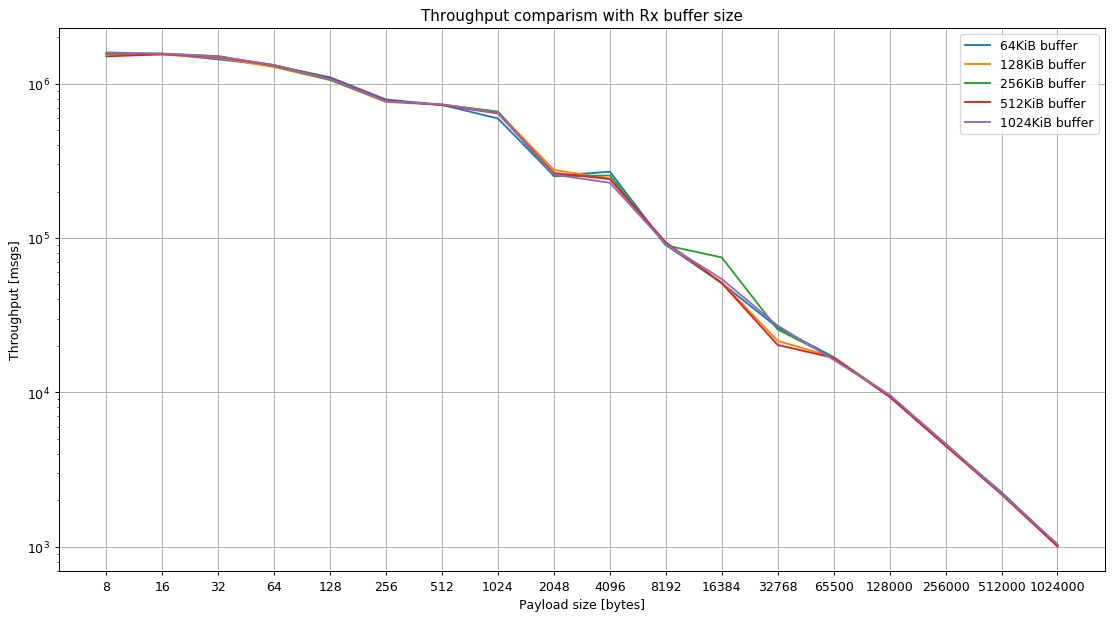

In [15]:
# Simple plot of throughtput
tx_group = df_thr.groupby(by=["tx_batches"])

plot_group = tx_group.get_group(16)

buff_group = plot_group.groupby(by=["sub_buff"])
plt.figure(figsize=(15,8),dpi=90)
x_real = []
for g_name,g_buff in buff_group: 
#     group128 = buff_group.get_group("128KiB")
    msg_group = g_buff.groupby(by="payload",sort=True)
    mean_thr = []
    x_real = []
    for name, group in msg_group:
            x_real.append(name)
            mean_thr.append(group.mean()["throughput"])

    plot_index = np.arange(len(mean_thr))

    plt.plot(plot_index,mean_thr,label=str(g_name)+"KiB buffer")
plt.legend()
plt.grid()
plt.xlabel("Payload size [bytes]")
plt.ylabel("Throughput [msgs]")
plt.yscale("log")
# plt.xscale("log",basex=2)
plt.title("Throughput comparism with Rx buffer size")
plt.xticks(np.arange(len(x_real)),x_real)

([<matplotlib.axis.XTick at 0x7f3b13e78210>,
 <a list of 18 Text xticklabel objects>)

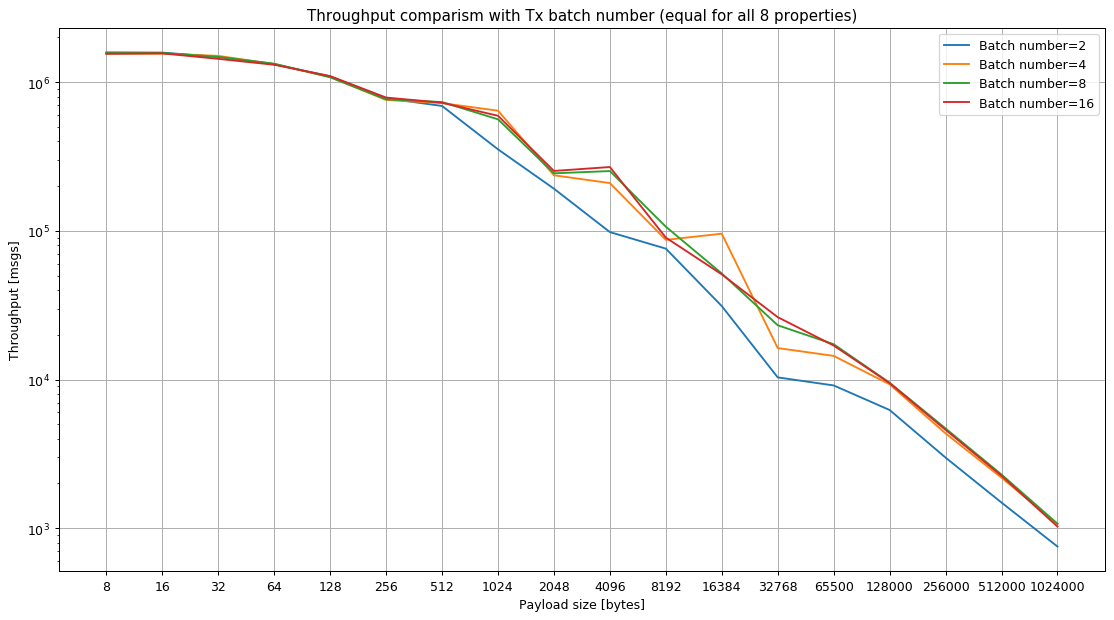

In [51]:
# Simple plot of throughtput
tx_group = df_thr.groupby(by=["sub_buff"])

plot_group = tx_group.get_group(64)

buff_group = plot_group.groupby(by=["tx_batches"])
plt.figure(figsize=(15,8),dpi=90)
x_real = []
for g_name,g_buff in buff_group: 
#     group128 = buff_group.get_group("128KiB")
    msg_group = g_buff.groupby(by="payload",sort=True)
    mean_thr = []
    x_real = []
    for name, group in msg_group:
            x_real.append(name)
            mean_thr.append(group.mean()["throughput"])

    plot_index = np.arange(len(mean_thr))

    plt.plot(plot_index,mean_thr,label="Batch number="+str(g_name))
plt.legend()
plt.grid()
plt.xlabel("Payload size [bytes]")
plt.ylabel("Throughput [msgs]")
plt.yscale("log")
# plt.xscale("log",basex=2)
plt.title("Throughput comparism with Tx batch number (equal for all 8 properties)")
plt.xticks(np.arange(len(x_real)),x_real)

[64, 128, 256, 512, 1024]


Text(0.5, 1.0, 'Throutput of payload size 1024 (95% C.I.)')

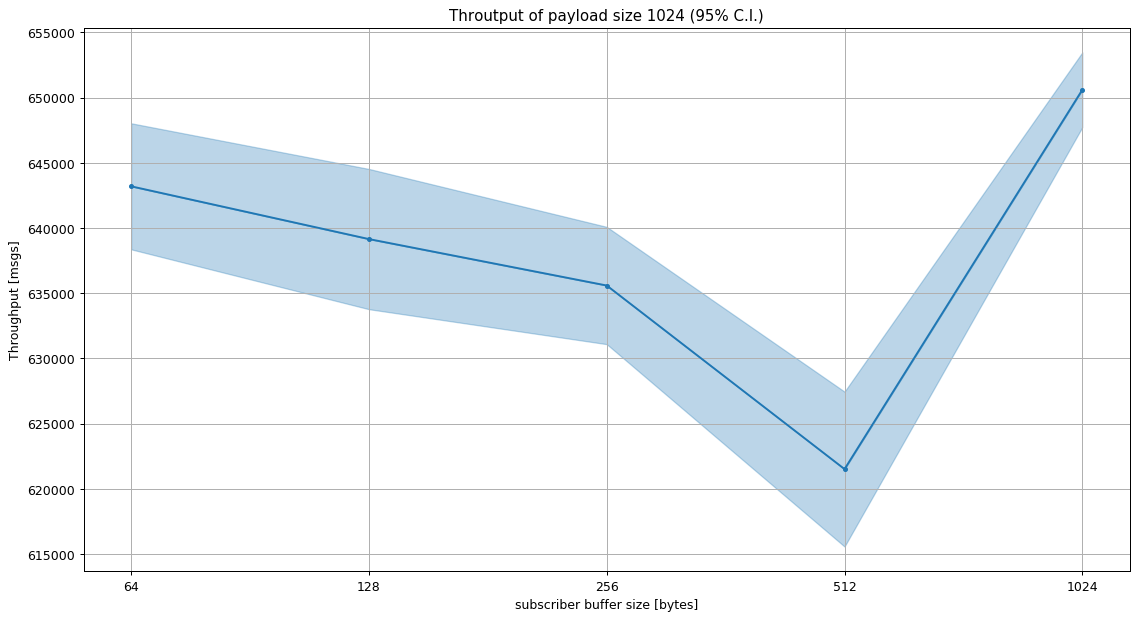

In [46]:
payload_size = 1024
df_thr_batch = df_thr.groupby(by=["tx_batches"])
df_to_plot = df_thr_batch.get_group(4)
df_thr_payload=df_to_plot.groupby(by=["payload"])
g = df_thr_payload.get_group(payload_size)

buff_group = []
buff_label = []

for label,group in g.groupby(by=["sub_buff"]):
    buff_label.append(label)
    buff_group.append(group["throughput"].tolist())

print(buff_label)

real_index= [0,1,2,3,4]


fig = plt.figure(figsize=(15,8),dpi=90)
plt.plot(real_index,np.mean(buff_group, axis=1), linestyle='-', marker='o', markersize=3, color='tab:blue')
plot_confidence_interval (plt, buff_group, real_index, "tab:blue")
plt.xticks(real_index,buff_label)
plt.grid()
plt.xlabel("subscriber buffer size [bytes]")
plt.ylabel("Throughput [msgs]")
plt.title("Throutput of payload size "+str(payload_size)+" (95% C.I.)")

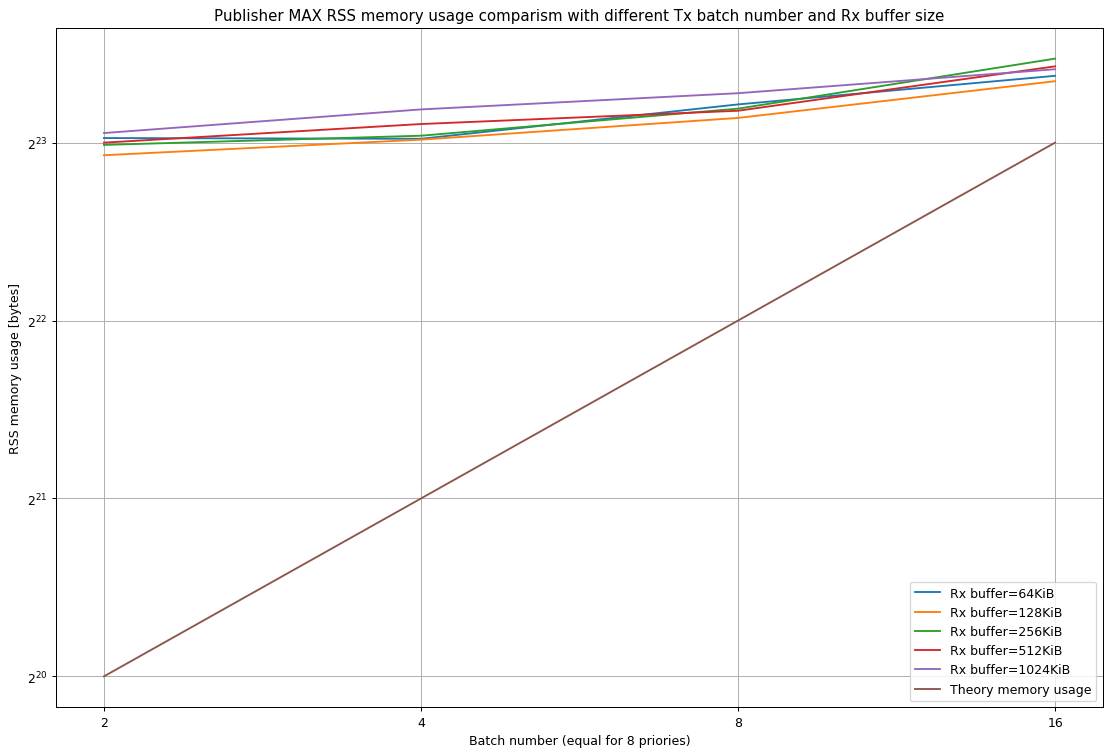

In [49]:
plt.figure(figsize=(15,10),dpi=90)
pub_buff_group = df_mem_pub.groupby(by="sub_buff")
# plot_group = pub_buff_group.get_group(64).groupby(by="tx_batches")
# plot_group
theory_plot_flag = 0
for g_name,g_buff in pub_buff_group: 
    groups = g_buff.groupby(by="tx_batches",sort=True)
    max_real = []
    batches = []
    for name, group in groups:
            batches.append(name)
            max_real.append(group.max()["RSS"])

    plot_index = np.arange(len(max_real))

#     if theory_plot_flag == 0 :
#         theory_mem=[]
#         for b in batches:
#             theory_mem.append(b*8*65536)
#         plt.plot(plot_index,theory_mem,label="Theory memory usage")
#         theory_plot_flag=1
    
    
    plt.plot(plot_index,max_real,label="Rx buffer="+str(g_name)+"KiB")
    plt.xticks(np.arange(len(batches)),batches)
    
theory_mem=[]
for b in batches:
    theory_mem.append(b*8*65536)
plt.plot(plot_index,theory_mem,label="Theory memory usage")


plt.legend()
plt.grid()
plt.xlabel("Batch number (equal for 8 priories)")
plt.ylabel("RSS memory usage [bytes]")
plt.title("Publisher MAX RSS memory usage comparism with different Tx batch number and Rx buffer size")
plt.yscale("log",basey=2)



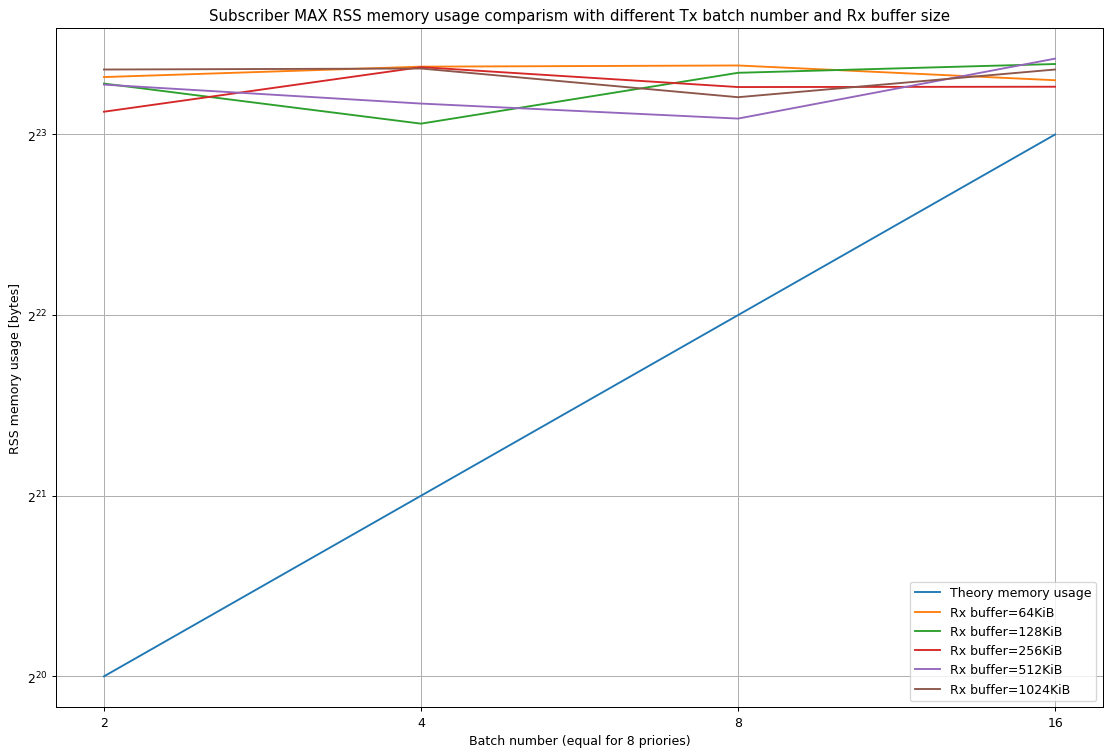

In [50]:
plt.figure(figsize=(15,10),dpi=90)
sub_buff_group = df_mem_sub.groupby(by="sub_buff")
# plot_group = pub_buff_group.get_group(64).groupby(by="tx_batches")
# plot_group
theory_plot_flag = 0
for g_name,g_buff in sub_buff_group: 
    groups = g_buff.groupby(by="tx_batches",sort=True)
    max_real = []
    batches = []
    for name, group in groups:
            batches.append(name)
            max_real.append(group.max()["RSS"])

    plot_index = np.arange(len(max_real))

    if theory_plot_flag == 0 :
        theory_mem=[]
        for b in batches:
            theory_mem.append(b*8*65536)
        plt.plot(plot_index,theory_mem,label="Theory memory usage")
        theory_plot_flag=1
    
    
    plt.plot(plot_index,max_real,label="Rx buffer="+str(g_name)+"KiB")
    plt.xticks(np.arange(len(batches)),batches)
    

            


plt.legend()
plt.grid()
plt.xlabel("Batch number (equal for 8 priories)")
plt.ylabel("RSS memory usage [bytes]")
plt.title("Subscriber MAX RSS memory usage comparism with different Tx batch number and Rx buffer size")
plt.yscale("log",basey=2)

Text(0.5, 1.0, 'Throutput of payload size 16')

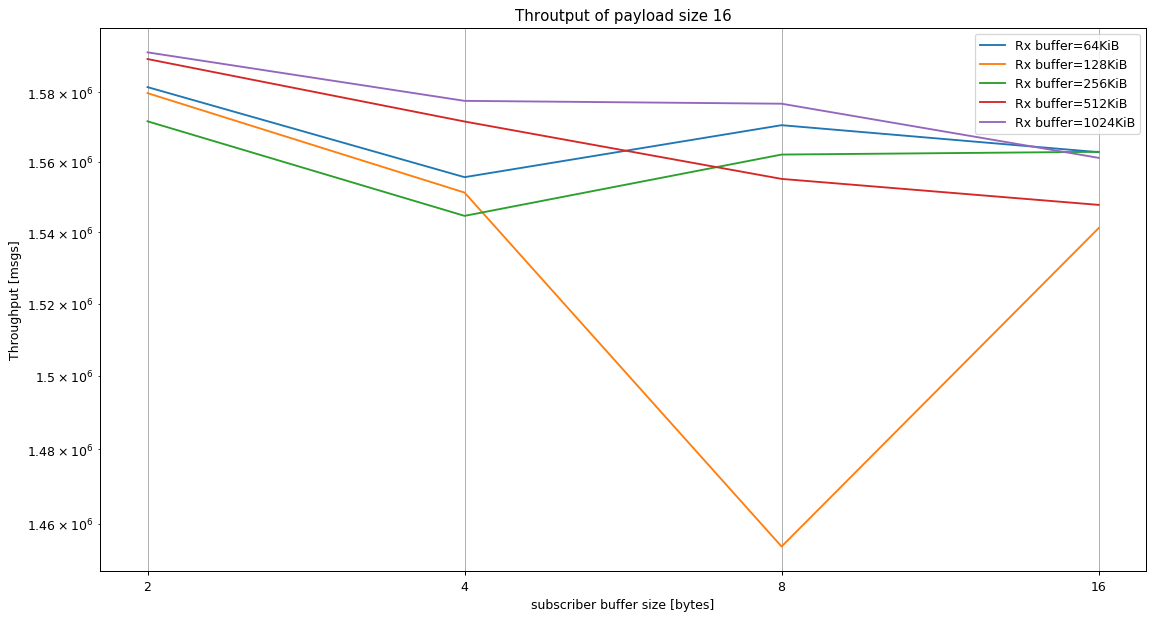

In [32]:
payload_size = 16
df_thr_payload=df_thr.groupby(by=["payload"])
plot_group = df_thr_payload.get_group(payload_size)


fig = plt.figure(figsize=(15,8),dpi=90)
for label,groups in plot_group.groupby(by=["sub_buff"]):
    x_real = []
    y_throughput = []
    for name,group in groups.groupby(by="tx_batches"):
        x_real.append(name)
        y_throughput.append(group.mean()["throughput"])
    
    plt.plot(np.arange(len(x_real)),y_throughput,label="Rx buffer="+str(label)+"KiB")
    plt.xticks(np.arange(len(x_real)),x_real)



plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("subscriber buffer size [bytes]")
plt.ylabel("Throughput [msgs]")
plt.title("Throutput of payload size "+str(payload_size))